In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


2024-10-09 10:31:36.666702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 10:31:36.749419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 10:31:36.773681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 10:31:36.921111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 10:31:38.283180: W tensorflow/compiler/tf2

In [6]:
input_shape =(28,28,1)

In [3]:
def plotData(history, metric):
    train_metrics = history.history[metric]
    validation_metrics = history.history["val_"+metric]

    epochs = range(1, len(train_metrics)+1)

    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)

    plt.title("Training&Validation"+metric)

    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric,"val_"+metric])

    plt.show()

In [4]:
def plotLR(history):
    learning_rate = history.history["lr"]
    epochs = range(1, len(learning_rate)+1)

    plt.plot(epochs, learning_rate)

    plt.title("Learning Rate")

    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")

    plt.show()

In [8]:
from keras.datasets import mnist

(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

print("Shape of Train Images:", train_images.shape)
print("Shape of Test Images:", test_images.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

def mnist_model(input_shape):
    model = Sequential([Conv2D(28, kernel_size =(3,3), input_shape=input_shape),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128, activation="relu"),
                        Dropout(0.2),
                        Dense(10, activation="softmax"),
                        ])
    model.compile(
                  optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                  )
    
    return model

In [23]:
model = mnist_model(input_shape)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()

history_early_stopping = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping]
)

Epoch 1/50
750/750 - 9s - 12ms/step - accuracy: 0.8128 - loss: 1.1519 - val_accuracy: 0.9323 - val_loss: 0.2659
Epoch 2/50
750/750 - 7s - 9ms/step - accuracy: 0.9141 - loss: 0.3207 - val_accuracy: 0.9538 - val_loss: 0.1853
Epoch 3/50
750/750 - 7s - 10ms/step - accuracy: 0.9364 - loss: 0.2265 - val_accuracy: 0.9635 - val_loss: 0.1503
Epoch 4/50
750/750 - 7s - 10ms/step - accuracy: 0.9481 - loss: 0.1815 - val_accuracy: 0.9682 - val_loss: 0.1295
Epoch 5/50
750/750 - 7s - 10ms/step - accuracy: 0.9576 - loss: 0.1459 - val_accuracy: 0.9678 - val_loss: 0.1410


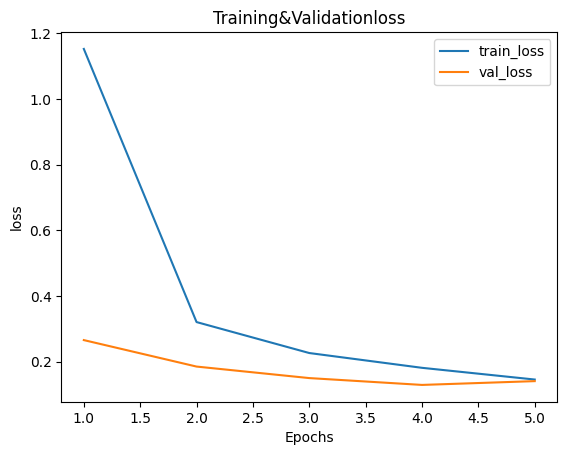

In [9]:
plotData(history_early_stopping, "loss")

In [10]:
model = mnist_model(input_shape)

early_stopping_1 = EarlyStopping(
    monitor = "vall_accuracy",
    patience = 3, #herhangi bir gelisme olms. dahi egitime +3 adim daha devam eder
    min_delta = 0.001, #kabul edebilecegi min. iyilesme orani ->0.001
    mode ="min", #auto
)

history_early_stopping_1 = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.2,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping_1]
)


Epoch 1/50
750/750 - 10s - 13ms/step - accuracy: 0.8349 - loss: 1.0868 - val_accuracy: 0.9362 - val_loss: 0.2387
Epoch 2/50


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `vall_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


750/750 - 7s - 9ms/step - accuracy: 0.9185 - loss: 0.2929 - val_accuracy: 0.9571 - val_loss: 0.1807
Epoch 3/50
750/750 - 7s - 10ms/step - accuracy: 0.9401 - loss: 0.2130 - val_accuracy: 0.9622 - val_loss: 0.1684
Epoch 4/50
750/750 - 7s - 10ms/step - accuracy: 0.9512 - loss: 0.1684 - val_accuracy: 0.9682 - val_loss: 0.1291
Epoch 5/50
750/750 - 7s - 10ms/step - accuracy: 0.9563 - loss: 0.1501 - val_accuracy: 0.9688 - val_loss: 0.1343
Epoch 6/50
750/750 - 7s - 9ms/step - accuracy: 0.9609 - loss: 0.1323 - val_accuracy: 0.9725 - val_loss: 0.1302
Epoch 7/50
750/750 - 7s - 9ms/step - accuracy: 0.9649 - loss: 0.1207 - val_accuracy: 0.9659 - val_loss: 0.1473
Epoch 8/50
750/750 - 8s - 11ms/step - accuracy: 0.9651 - loss: 0.1229 - val_accuracy: 0.9725 - val_loss: 0.1339
Epoch 9/50
750/750 - 8s - 11ms/step - accuracy: 0.9680 - loss: 0.1090 - val_accuracy: 0.9700 - val_loss: 0.1412
Epoch 10/50
750/750 - 6s - 9ms/step - accuracy: 0.9684 - loss: 0.1062 - val_accuracy: 0.9747 - val_loss: 0.1335
Epoch 

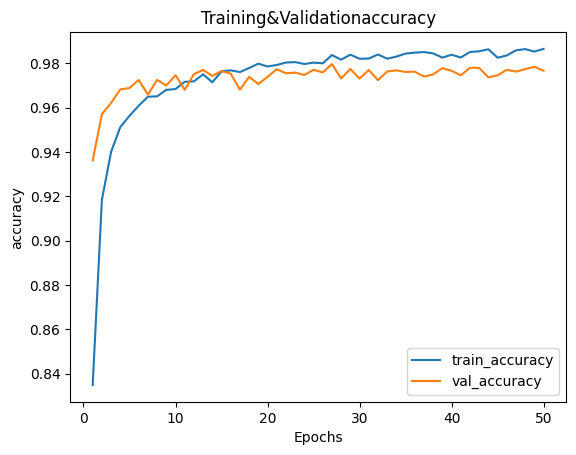

In [11]:
plotData(history_early_stopping_1,"accuracy")

In [12]:
from keras.callbacks import CSVLogger

csv = CSVLogger("logs/result.csv")
model = mnist_model(input_shape)

history_csv_logger = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [csv]
                               )

Epoch 1/20
750/750 - 7s - 9ms/step - accuracy: 0.8407 - loss: 0.8505 - val_accuracy: 0.9279 - val_loss: 0.2825
Epoch 2/20
750/750 - 6s - 8ms/step - accuracy: 0.9224 - loss: 0.2883 - val_accuracy: 0.9553 - val_loss: 0.1762
Epoch 3/20
750/750 - 6s - 8ms/step - accuracy: 0.9431 - loss: 0.2023 - val_accuracy: 0.9657 - val_loss: 0.1386
Epoch 4/20
750/750 - 6s - 8ms/step - accuracy: 0.9528 - loss: 0.1641 - val_accuracy: 0.9693 - val_loss: 0.1392
Epoch 5/20
750/750 - 7s - 9ms/step - accuracy: 0.9572 - loss: 0.1451 - val_accuracy: 0.9706 - val_loss: 0.1371
Epoch 6/20
750/750 - 7s - 10ms/step - accuracy: 0.9632 - loss: 0.1288 - val_accuracy: 0.9711 - val_loss: 0.1315
Epoch 7/20
750/750 - 7s - 9ms/step - accuracy: 0.9653 - loss: 0.1202 - val_accuracy: 0.9706 - val_loss: 0.1342
Epoch 8/20
750/750 - 6s - 9ms/step - accuracy: 0.9678 - loss: 0.1132 - val_accuracy: 0.9732 - val_loss: 0.1327
Epoch 9/20
750/750 - 7s - 10ms/step - accuracy: 0.9688 - loss: 0.1056 - val_accuracy: 0.9732 - val_loss: 0.1246

In [13]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

pd.read_csv("logs/result.csv", index_col="epoch")

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.840750,0.850494,0.927917,0.282472
1,0.922396,0.288298,0.955250,0.176191
2,0.943062,0.202269,0.965667,0.138578
3,0.952833,0.164052,0.969250,0.139183
4,0.957208,0.145127,0.970583,0.137083
5,0.963250,0.128788,0.971083,0.131476
6,0.965292,0.120227,0.970583,0.134204
7,0.967792,0.113163,0.973250,0.132680
8,0.968771,0.105640,0.973167,0.124618


In [15]:
from keras.callbacks import ModelCheckpoint 
#eigitim dosyalarını belirli adımlarla kaydetmemizi saglar

path = "models/checkpoint.weights.h5"

checkpoint = ModelCheckpoint(
                             filepath = path,
                             save_freq ="epoch", #hangi sıklıkla kaydetmek istiyoruz
                             save_weights_only = True,
                             verbose =1,
                             )

model = mnist_model(input_shape)

history_checkpoint = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 10,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [checkpoint]
                               )

Epoch 1/10


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: saving model to models/checkpoint.weights.h5
750/750 - 11s - 14ms/step - accuracy: 0.8309 - loss: 1.1819 - val_accuracy: 0.9267 - val_loss: 0.2776
Epoch 2/10

Epoch 2: saving model to models/checkpoint.weights.h5
750/750 - 8s - 10ms/step - accuracy: 0.9178 - loss: 0.2962 - val_accuracy: 0.9560 - val_loss: 0.1633
Epoch 3/10

Epoch 3: saving model to models/checkpoint.weights.h5
750/750 - 8s - 10ms/step - accuracy: 0.9413 - loss: 0.2096 - val_accuracy: 0.9643 - val_loss: 0.1455
Epoch 4/10

Epoch 4: saving model to models/checkpoint.weights.h5
750/750 - 8s - 10ms/step - accuracy: 0.9515 - loss: 0.1690 - val_accuracy: 0.9626 - val_loss: 0.1452
Epoch 5/10

Epoch 5: saving model to models/checkpoint.weights.h5
750/750 - 8s - 11ms/step - accuracy: 0.9579 - loss: 0.1441 - val_accuracy: 0.9655 - val_loss: 0.1279
Epoch 6/10

Epoch 6: saving model to models/checkpoint.weights.h5
750/750 - 8s - 11ms/step - accuracy: 0.9596 - loss: 0.1351 - val_accuracy: 0.9718 - val_loss: 0.1267
Epoch 7/

In [16]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = "val_loss",
                              factor = 0.2,
                              patience = 0,
                              #min_lr = 0.001,
                              verbose = 2
                              )

model = mnist_model(input_shape)

history_reduce_lr = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [reduce_lr]
                               )

Epoch 1/20
750/750 - 11s - 15ms/step - accuracy: 0.8283 - loss: 1.0073 - val_accuracy: 0.9397 - val_loss: 0.2351 - learning_rate: 0.0010
Epoch 2/20
750/750 - 8s - 10ms/step - accuracy: 0.9185 - loss: 0.2931 - val_accuracy: 0.9579 - val_loss: 0.1740 - learning_rate: 0.0010
Epoch 3/20
750/750 - 8s - 11ms/step - accuracy: 0.9381 - loss: 0.2187 - val_accuracy: 0.9655 - val_loss: 0.1450 - learning_rate: 0.0010
Epoch 4/20
750/750 - 8s - 10ms/step - accuracy: 0.9520 - loss: 0.1697 - val_accuracy: 0.9651 - val_loss: 0.1449 - learning_rate: 0.0010
Epoch 5/20
750/750 - 8s - 10ms/step - accuracy: 0.9534 - loss: 0.1557 - val_accuracy: 0.9649 - val_loss: 0.1448 - learning_rate: 0.0010
Epoch 6/20

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
750/750 - 8s - 10ms/step - accuracy: 0.9580 - loss: 0.1441 - val_accuracy: 0.9687 - val_loss: 0.1448 - learning_rate: 0.0010
Epoch 7/20
750/750 - 8s - 10ms/step - accuracy: 0.9745 - loss: 0.0826 - val_accuracy: 0.9775 - val_loss: 

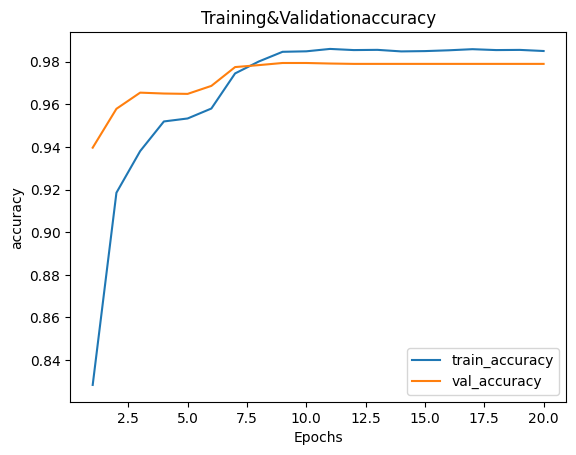

In [17]:
#plotLR(history_reduce_lr)
plotData(history_reduce_lr, "accuracy")

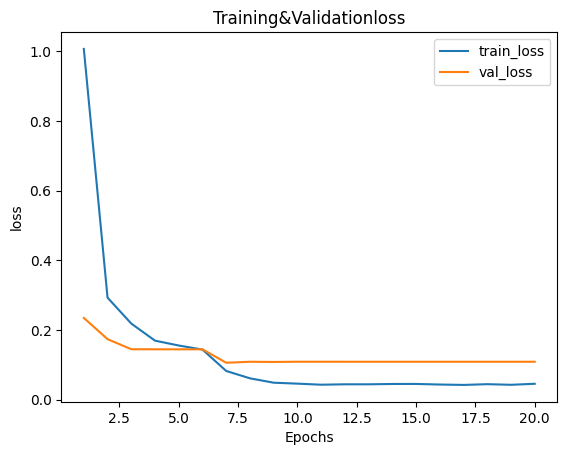

In [18]:
plotData(history_reduce_lr,"loss")

In [19]:
import numpy as np
from keras.callbacks import LearningRateScheduler
#calisma esnasında sürekli lr'i gunceller
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * np.exp(-0.1))  # numpy kullanarak float'a dönüştürüyoruz #return lr * tf.exp(-0.1)
    
model = mnist_model(input_shape)

history_lr_scheduler = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [LearningRateScheduler(scheduler, verbose=1)]
                               )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20


750/750 - 6s - 9ms/step - accuracy: 0.8403 - loss: 0.9559 - val_accuracy: 0.9319 - val_loss: 0.2729 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
750/750 - 6s - 8ms/step - accuracy: 0.9147 - loss: 0.3103 - val_accuracy: 0.9535 - val_loss: 0.1895 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
750/750 - 6s - 8ms/step - accuracy: 0.9388 - loss: 0.2199 - val_accuracy: 0.9656 - val_loss: 0.1370 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
750/750 - 6s - 8ms/step - accuracy: 0.9520 - loss: 0.1654 - val_accuracy: 0.9672 - val_loss: 0.1323 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
750/750 - 6s - 8ms/step - accuracy: 0.9564 - loss: 0.1536 - val_accuracy: 0.9660 - val_loss: 0.1378 - learning_rate: 0.0010

Epoch 6: Learni

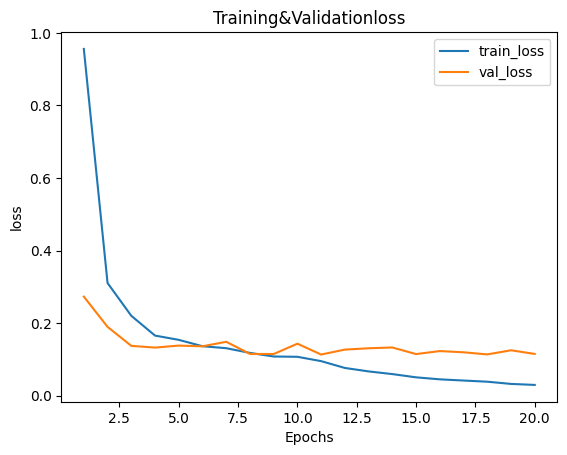

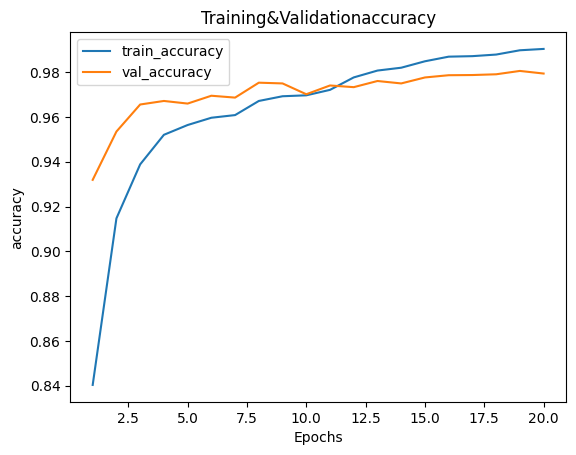

In [20]:
#plotLR(history_lr_scheduler)
plotData(history_lr_scheduler,"loss")
plotData(history_lr_scheduler,"accuracy")

In [9]:
from keras.callbacks import TensorBoard
import time

timestamp = time.strftime("%Y_%m_%d_%H_%M_%S")
tensorboard = TensorBoard(log_dir=f"./logs/tensorboard/{timestamp}", histogram_freq=1)


model = mnist_model(input_shape)

history_tensorboard = model.fit(
                                x = train_images,
                                y = train_labels,
                                epochs = 50,
                                validation_split = 0.2,
                                batch_size = 64,
                                verbose = 2,
                                callbacks = [tensorboard]
                                )


Epoch 1/50
750/750 - 7s - 9ms/step - accuracy: 0.8538 - loss: 0.7725 - val_accuracy: 0.9431 - val_loss: 0.2106
Epoch 2/50
750/750 - 6s - 8ms/step - accuracy: 0.9246 - loss: 0.2731 - val_accuracy: 0.9595 - val_loss: 0.1572
Epoch 3/50
750/750 - 6s - 8ms/step - accuracy: 0.9446 - loss: 0.1950 - val_accuracy: 0.9643 - val_loss: 0.1497
Epoch 4/50
750/750 - 6s - 8ms/step - accuracy: 0.9551 - loss: 0.1608 - val_accuracy: 0.9716 - val_loss: 0.1250
Epoch 5/50
750/750 - 6s - 8ms/step - accuracy: 0.9606 - loss: 0.1383 - val_accuracy: 0.9705 - val_loss: 0.1299
Epoch 6/50
750/750 - 7s - 9ms/step - accuracy: 0.9626 - loss: 0.1333 - val_accuracy: 0.9729 - val_loss: 0.1136
Epoch 7/50
750/750 - 6s - 9ms/step - accuracy: 0.9667 - loss: 0.1176 - val_accuracy: 0.9703 - val_loss: 0.1223
Epoch 8/50
750/750 - 6s - 9ms/step - accuracy: 0.9684 - loss: 0.1106 - val_accuracy: 0.9754 - val_loss: 0.1106
Epoch 9/50
750/750 - 7s - 10ms/step - accuracy: 0.9700 - loss: 0.1072 - val_accuracy: 0.9743 - val_loss: 0.1187


In [10]:
print("tensorboard --logdir="+tensorboard.log_dir)

tensorboard --logdir=./logs/tensorboard/2024_10_09_13_12_23
